In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')
us = pd.read_csv(r'C:\Users\Administrateur\Downloads\data_youtube_datasets_USvideos.csv')

us.shape



(40949, 16)

In [2]:
us.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [3]:
#Some of the columns are redundant for our analysis so we will drop them.
us.drop(['video_id','thumbnail_link', 'description'], axis=1, inplace=True)

us.shape

(40949, 13)

In [4]:
us.dtypes

trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
dtype: object

In [5]:
us[['trending_date','publish_time']].head()

,trending_date,publish_time
0,17.14.11,2017-11-13T17:13:01.000Z
1,17.14.11,2017-11-13T07:30:00.000Z
2,17.14.11,2017-11-12T19:05:24.000Z
3,17.14.11,2017-11-13T11:00:04.000Z
4,17.14.11,2017-11-12T18:01:41.000Z


In [6]:
us['publish_time'] = us['publish_time'].astype('datetime64[ns]')

For the trending date column, we need some reformatting. The first two characters represent the last two digits of year (e.g. 17 is 2017). Since the data belongs to years 2017 and 2018, a simple solution is to concatenate the column with ‘20’.

In [7]:
us['trending_date'] = ['20'] + us['trending_date']

The order in trending date column is year, day, and month which is not the standard format. However, we can easily handle it using the format parameter of the to_datetime function.

In [8]:
us['trending_date'] = pd.to_datetime(us['trending_date'], format = "%Y.%d.%m")

In [9]:
us[['trending_date','publish_time']].head()

,trending_date,publish_time
0,2017-11-14,2017-11-13 17:13:01
1,2017-11-14,2017-11-13 07:30:00
2,2017-11-14,2017-11-12 19:05:24
3,2017-11-14,2017-11-13 11:00:04
4,2017-11-14,2017-11-12 18:01:41


In [10]:
us[['trending_date','publish_time']].dtypes

trending_date    datetime64[ns]
publish_time     datetime64[ns]
dtype: object

In [11]:
us['time_diff'] = us['trending_date'] - us['publish_time']

In [12]:
us['time_diff'][:5]

0   0 days 06:46:59
1   0 days 16:30:00
2   1 days 04:54:36
3   0 days 12:59:56
4   1 days 05:58:19
Name: time_diff, dtype: timedelta64[ns]

In [13]:
print(us['publish_time'].dt.date[0])
print(us['publish_time'].dt.time[0])

2017-11-13
17:13:01


In [14]:
us['title'][:5]

0                   WE WANT TO TALK ABOUT OUR MARRIAGE
1    The Trump Presidency: Last Week Tonight with J...
2    Racist Superman | Rudy Mancuso, King Bach & Le...
3                     Nickelback Lyrics: Real or Fake?
4                             I Dare You: GOING BALD!?
Name: title, dtype: object

Some titles contain all capital letters whereas some is mixture of capital and lower case letters. Let’s convert them all to lower case letters.
The lower method of str accessor will do the job for us.


In [15]:
us['title'] = us['title'].str.lower()
us['title'][:5]

0                   we want to talk about our marriage
1    the trump presidency: last week tonight with j...
2    racist superman | rudy mancuso, king bach & le...
3                     nickelback lyrics: real or fake?
4                             i dare you: going bald!?
Name: title, dtype: object

It is better to also remove the punctuation so that we have cleaner textual data. There are many alternatives to remove punctuation. One of the simplest ways to use the replace function of str accessor and perform regex-based replacement.

In [16]:
us['title'] = us['title'].str.replace(r'[^\w\s]+', '')

us['title'][:5]

0                   we want to talk about our marriage
1    the trump presidency last week tonight with jo...
2    racist superman  rudy mancuso king bach  lele ...
3                       nickelback lyrics real or fake
4                                i dare you going bald
Name: title, dtype: object

You may get confused because of the dots in the second and third lines. These are not parts of the string in those cells. They are just longer than the number of characters pandas display based on the current display settings.
Here is the title in the second line.

In [17]:
us['title'][1]

'the trump presidency last week tonight with john oliver hbo'

we may want to know the average time difference between a video is published and it becomes trending.
The data type of the time diff column is timedelta which allows for using aggregate functions so we can apply the mean function.

In [18]:
us.time_diff.mean()

Timedelta('16 days 05:21:53.236220664')

The dataset contains approximately 40 thousand rows. I wonder if most of the videos uploaded by different channels. One way to give us insight is to check the number of unique channels.

In [19]:
us.channel_title.nunique()

2207

There are 2207 unique channels in the dataset which means some of them have many trending videos.

After cleaning and some preprocessing, the dataset contains 13 columns as below:

In [20]:
us.columns

Index(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'time_diff'],
      dtype='object')

In [21]:
us.time_diff.mean()

Timedelta('16 days 05:21:53.236220664')

In order to have obtain a thorough overview about the distribution of time difference, we need to also calculate other descriptive statistics such as median and mode. Another solution is to visualize the distribution of this column which makes it easier to understand.

The data type of the time_diff column is timedelta. We need to convert it to a numerical variable to plot its distribution. One way is to divide the time_diff column by another timedelta interval. For instance, we can convert it to hours as below.

In [22]:
us['time_diff_hour'] = us['time_diff'] / pd.Timedelta('1 hour')

us['time_diff_hour'].mean()

389.3647878390736

In [23]:
us['time_diff_hour'].mean() / 24

16.223532826628066

<AxesSubplot:ylabel='time_diff_hour'>

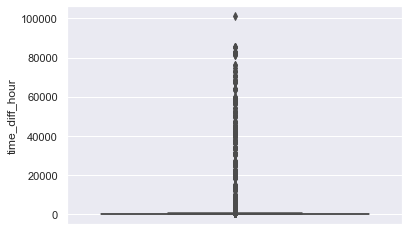

In [24]:
sns.boxplot(data=us, y='time_diff_hour')

There are some extreme values that distort the distribution plots. The average value of this column is 389 but we observe outliers as high as 100000. 

Let’s see if we can afford to eliminate the outliers.

In [25]:
len(us)

40949

In [26]:
len(us[us.time_diff_hour > 600])

588

The number of rows in which the time difference is more than 600 hours is 588 which is very small compared to the total number rows in the dataset. 

Thus, we can drop these outliers.

In [27]:
us = us[us.time_diff_hour <= 600]

We have eliminated a substantial amount of the outliers. Another type of visualization to check the distribution is histogram which divides the value range of a continuous variable into discrete bins and counts the number of observations in each bin.

The displot function of Seaborn can be used to create a histogram as below.

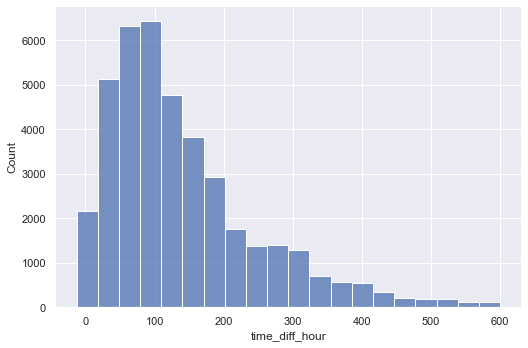

In [28]:
sns.displot(data=us, x='time_diff_hour', kind='hist',
aspect=1.5, bins=20)

Most of the values are around 100 so it is like to become trending in approximately 4 days.

I wonder which channels have the most trending videos. We can easily see the top 10 using the value_counts function of pandas.

In [29]:
us.channel_title.value_counts()[:10]

ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
TheEllenShow                              193
Netflix                                   193
Vox                                       193
The Late Show with Stephen Colbert        187
Jimmy Kimmel Live                         186
Late Night with Seth Meyers               183
Screen Junkies                            182
NBA                                       181
Name: channel_title, dtype: int64

We can also compare the average views of trending videos published by these channels. It would be interesting to check if the order of average views is the same as the order of trending video count.

The group by function of pandas with multiple aggregate functions will give us what we need.

In [30]:
us['views_mil'] = us['views'] / 1000000

In [31]:
us[['channel_title','views_mil']].groupby('channel_title')\
.agg(['mean','count'])\
.sort_values(by=('views_mil','count'), ascending=False)[:10]

views_mil      
                                            mean count
channel_title                                         
ESPN                                    0.520464   203
The Tonight Show Starring Jimmy Fallon  1.377799   197
Vox                                     0.635409   193
Netflix                                 0.962789   193
TheEllenShow                            1.315244   193
The Late Show with Stephen Colbert      0.661367   187
Jimmy Kimmel Live                       1.534509   186
Late Night with Seth Meyers             0.992362   183
Screen Junkies                          1.753162   182
NBA                                     0.400025   181

The Screen Junkies channel has the highest average which is about 1.75 million per video. ESPN has the second lowest average although it has the highest number of trending videos.

We can also find out how the number of trending videos changes over time. The first step is to group the observations (i.e. rows) by date. Then we will sort them by date to have a proper time series.

In [32]:
daily = us[['trending_date']].value_counts().reset_index()\
.sort_values(by='trending_date').reset_index(drop=True)


In [33]:
daily.head()

,trending_date,0
0,2017-11-14,192
1,2017-11-15,195
2,2017-11-16,195
3,2017-11-17,197
4,2017-11-18,199


In [37]:
columns = ['trending_date', 'number of videos']


In [38]:
daily.columns = columns

In [39]:
daily.head()

,trending_date,number of videos
0,2017-11-14,192
1,2017-11-15,195
2,2017-11-16,195
3,2017-11-17,197
4,2017-11-18,199


The daily dataframe contains the date and the number of videos that become trending in each date. We can now generate a line plot based on the daily dataframe.

In [34]:
len(daily['trending_date'])
len(daily[0])

205

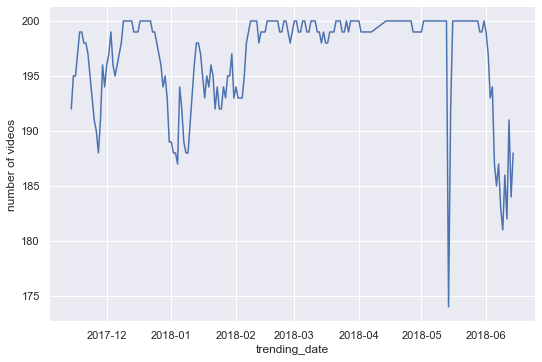

In [42]:
sns.relplot(data=daily, x='trending_date', y='number of videos',
kind='line', aspect=1.5)


We observe an interesting trend. Most of the values are between 190 and 200 with a few exceptional days.

Let’s also find the trending video with the highest number of views. There are multiple ways to accomplish this task. 

What we will do is to sort the dataframe according to the view in descending order and display the title and views of the first row.

In [43]:
us.sort_values(by='views', ascending=False)[['title','views']].iloc[0,:]

title    childish gambino  this is america official video
views                                           217750076
Name: 38146, dtype: object

The most trending video in terms of the number of views have been viewed over 200 million times.